# Лабраторная работа №5

Выполнила: Иванова Елизавета Дмитриевна, НПМмд-01-23

# Импорт библиотек

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adadelta
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import os
from PIL import Image

# Задание

1. Создать и обучить НС для распознавания на датасете FASHION из пакета KERAS по аналогии с распознавание на MNIST
2. Проверить качество обучения на тестовой выборке
3. Показать варианты неверного распознания и вычислить сколько примеров было распознано неверно

## Предобработка данных

In [2]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок
print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


In [3]:
# Нормализация изображений
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Перекодировка меток в one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Разделение данных на обучающую и проверочную выборки
# Из 60,000 примеров берем 50,000 для обучения и 10,000 для проверки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000/60000, random_state=42)

# Вывод размерностей для проверки
print(f"Обучающая выборка: {x_train.shape[0]} примеров")
print(f"Проверочная выборка: {x_val.shape[0]} примеров")
print(f"Тестовая выборка: {x_test.shape[0]} примеров")

Обучающая выборка: 50000 примеров
Проверочная выборка: 10000 примеров
Тестовая выборка: 10000 примеров


## Нейронная сеть

In [4]:
model = Sequential([Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2), strides=2),
                    Conv2D(64, (3, 3), padding='same', activation='relu'),
                    MaxPooling2D((2, 2), strides=2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10,  activation='softmax')])
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128, verbose=1)
print(model.summary())

Epoch 1/10


/Users/iveeliz/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7370 - loss: 0.7407 - val_accuracy: 0.8717 - val_loss: 0.3515
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8797 - loss: 0.3379 - val_accuracy: 0.8858 - val_loss: 0.3068
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9000 - loss: 0.2789 - val_accuracy: 0.9010 - val_loss: 0.2725
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9092 - loss: 0.2538 - val_accuracy: 0.9011 - val_loss: 0.2675
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9201 - loss: 0.2164 - val_accuracy: 0.9045 - val_loss: 0.2597
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9264 - loss: 0.1971 - val_accuracy: 0.9105 - val_loss: 0.2410
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9348 - loss: 0.1774 - val_accuracy: 0.9202 - val_loss: 0.2144
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9406 - loss: 0.1624 - val_accuracy: 0.916

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,928 (4.83 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,286 (3.22 MB)

None


In [5]:
results = []
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
val_acc = history.history['val_accuracy'][-1]
results.append({
    'Validation Accuracy': val_acc,
    'Test Accuracy': test_acc
})

pd.DataFrame(results)

,Validation Accuracy,Test Accuracy
0,0.92,0.9183


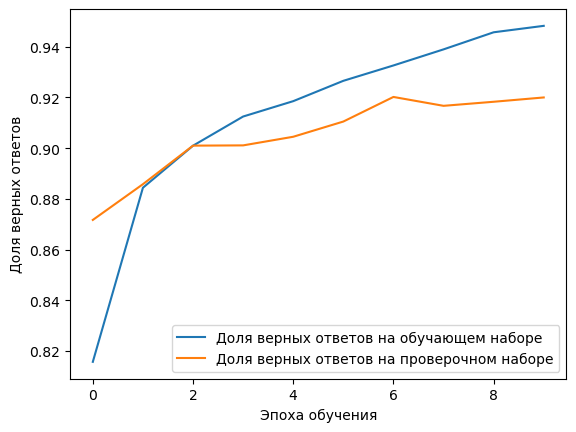

In [6]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Примеры предсказаний

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Результаты для Model 1


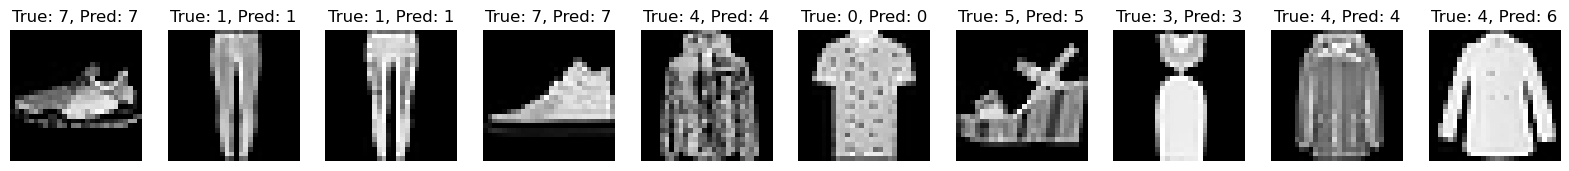

In [7]:
def plot_predictions(models, x_test, y_test, num_images=10):

    rand_pics = list(random.randint(0,10000,num_images))
    for i, model in enumerate(models):
        predictions = model.predict(x_test)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)
        print(f'Результаты для Model {i+1}')
        x_test_reshaped = x_test.reshape(-1, 28, 28)
        
        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
        for (num, j) in zip(range(num_images), rand_pics):
            ax = axes[num]
            ax.imshow(x_test_reshaped[j], cmap='gray')
            true_label = true_classes[j]
            predicted_label = predicted_classes[j]
            ax.set_title(f'True: {true_label}, Pred: {predicted_label}')
            ax.axis('off')
        plt.show()

models=[model]
plot_predictions(models, x_test, y_test, num_images=10)

### Примеры некорректных предсказаний

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Результаты для Model 1


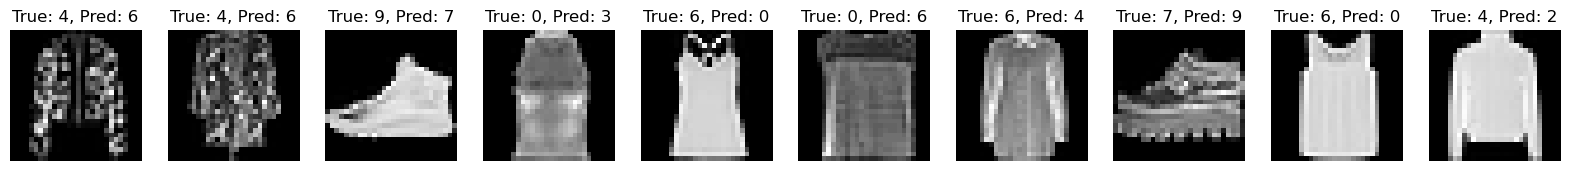

In [8]:
def plot_incorrect_predictions(models, x_test, y_test, num_images=10):
    
    x_test_flat = x_test.reshape(10000, 784)
    predictions_first_model = models[0].predict(x_test)
    predicted_classes_first_model = np.argmax(predictions_first_model, axis=1)
    true_classes = np.argmax(y_test, axis=1)
    incorrect_indices_first_model = np.where(predicted_classes_first_model != true_classes)[0]
    rand_pics = list(random.randint(0,len(incorrect_indices_first_model),num_images))
    
    for i, model in enumerate(models):
        predictions = model.predict(x_test)
        predicted_classes = np.argmax(predictions, axis=1)
        print(f'Результаты для Model {i+1}')
        x_test_reshaped = x_test.reshape(-1, 28, 28)

        fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
        for (num, j) in zip(range(num_images), rand_pics):
            idx = incorrect_indices_first_model[j] 
            ax = axes[num]
            ax.imshow(x_test_reshaped[idx], cmap='gray')
            true_label = true_classes[idx]
            predicted_label = predicted_classes[idx]
            ax.set_title(f'True: {true_label}, Pred: {predicted_label}')
            ax.axis('off')
        plt.show()

models=[model]
plot_incorrect_predictions(models, x_test, y_test, num_images=10)

## Количество правильных/неправильных предсказаний 

In [9]:
def number_of_correct_and_wrong_preds(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    correct, incorrect = 0, 0
    for i in range(10):
        correct_predictions = conf_matrix[i, i]
        incorrect_predictions = sum(conf_matrix[i, :]) - correct_predictions
        correct += correct_predictions
        incorrect += incorrect_predictions
        
    return correct, incorrect

In [10]:
corrects = []
incorrects = []
for model in models:
    corrects.append(number_of_correct_and_wrong_preds(model, x_test, y_test)[0])
    incorrects.append(number_of_correct_and_wrong_preds(model, x_test, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [11]:
table = {}
table['correct'] = corrects
table['incorrect'] = incorrects
pd.DataFrame(table)

,correct,incorrect
0,9183,817


### Количество правильных/неправильных предсказаний в каждом классе

In [12]:
def number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test):
    
    correct = {'Class 1': 0,'Class 2': 0,'Class 3': 0,'Class 4': 0,'Class 5': 0,
               'Class 6': 0,'Class 7': 0,'Class 8': 0,'Class 9': 0,'Class 10': 0}
    incorrect = {'Class 1': 0,'Class 2': 0,'Class 3': 0,'Class 4': 0,'Class 5': 0,
                 'Class 6': 0,'Class 7': 0,'Class 8': 0,'Class 9': 0,'Class 10': 0}
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    for i in range(10):
        correct_predictions = conf_matrix[i, i]
        incorrect_predictions = sum(conf_matrix[i, :]) - correct_predictions
        correct[f'Class {i+1}'] = correct_predictions
        incorrect[f'Class {i+1}'] = incorrect_predictions
        
    return correct, incorrect

In [13]:
corrects = number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test)[0]
incorrects = number_of_correct_and_wrong_preds_in_every_class(model, x_test, y_test)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
table = {'Class': [i for i in range(1,11)]}
table['correct'] = list(corrects.values())
table['incorrect'] = list(incorrects.values())
pd.DataFrame(table).set_index('Class')

,correct,incorrect
Class,,
1,911,89
2,993,7
3,875,125
4,903,97
5,850,150
6,982,18
7,756,244
8,990,10
9,984,16
